In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from sklearn.metrics import confusion_matrix
from scipy.stats import poisson, norm
from sklearn.decomposition import PCA
import sys
sys.path.append("/home/camp/warnert")
sys.path.append("/home/camp/warnert/working/Recordings/binary_pulses/blip_manuscript")
import blip_analysis_manu as ba
import exp_blip_models_manu as em
import scipy.io as sio
import binary_recording as br
from mpl_toolkits.axes_grid1 import make_axes_locatable
import daskify
from scipy.stats import skewnorm, mannwhitneyu
import scipy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 1408 trials in trial name file
Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 4608 trials in trial name file
Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 4288 trials in trial name file
Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 1440 trials in trial name file
Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 5328 trials in trial name file
Respiration peaks found
Found file starts
Found file ends
Respiration trace found
Found sniff spikes
Extracting trial names
Found 5328 trials in trial name file
Respiration peaks found
Found file

In [2]:
## Generate the glyph set
glyphs = []
for i in ba.get_trial_array():
    glyph_str = ''
    for j in i:
        if j == 1:
            glyph_str+='\u25AE'
        else:
            glyph_str += '\u25AF'



    glyphs.append(glyph_str)


In [3]:
### Set up the data
ba.units_usrts[1] = None
ba.units_usrts[3] = None
ba.units_usrts[5] = None

In [4]:
units_usrt1 = ba.get_usrts(1, pre_trial_window=0.5, post_trial_window=0.5)
units_usrt2 = ba.get_usrts(3, pre_trial_window=0.5, post_trial_window=0.5)
units_usrt3 = ba.get_usrts(5, pre_trial_window=0.5, post_trial_window=0.5)

/home/camp/warnert/neurolytics/joined_recording.py:79: UserWarning: Mismatch in repeat lengths, cannot make full numpy array
  warnings.warn('Mismatch in repeat lengths, cannot make full numpy array')


In [5]:
good_indexes = ba.get_stable_resp_indexes()

In [6]:
mean_usrt1 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt1])
mean_usrt2 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt2])
mean_usrt3 = np.array([[np.mean(i, axis=0) for i in j] for j in units_usrt3])

In [7]:
onset_trials = [1, 2, 4, 8, 16]

In [8]:

summed_response1 = mean_usrt1[:, :, 50:100].sum(axis=-1)
summed_response2 = mean_usrt2[:, :, 50:100].sum(axis=-1)
summed_response3 = mean_usrt3[:, :, 50:100].sum(axis=-1)


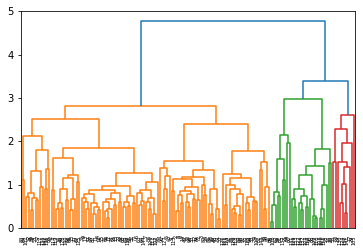

In [9]:
### Make dendogram
link = linkage(summed_response1/np.max(summed_response1, axis=-1)[:, np.newaxis], optimal_ordering=True, method='complete', )
dend = dendrogram(link)

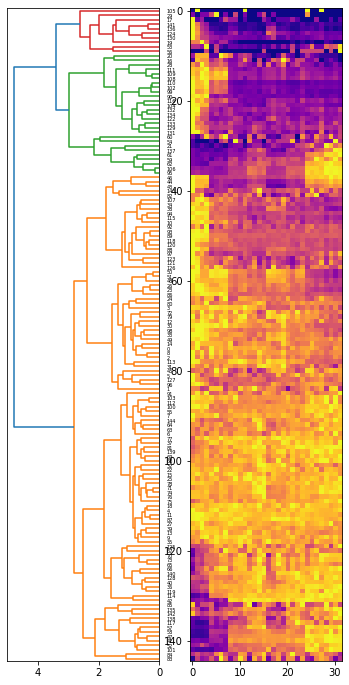

In [10]:
fig, ax  = plt.subplots(1, 2, figsize=(6, 12))
dend = dendrogram(link, ax=ax[0], orientation='left', truncate_mode=None, )
ax[1].imshow(summed_response1[dend['leaves'][::-1]]/np.max(summed_response1, axis=-1)[dend['leaves'][::-1], np.newaxis], cmap='plasma', aspect='auto')

In [11]:
z_scored_summed_response1 = (summed_response1 - np.min(summed_response1, axis=-1)[:, np.newaxis])/(np.max(summed_response1, axis=-1)[:, np.newaxis] - np.min(summed_response1, axis=-1)[:, np.newaxis])


Text(17, -2, '▯▯▯▯▮')

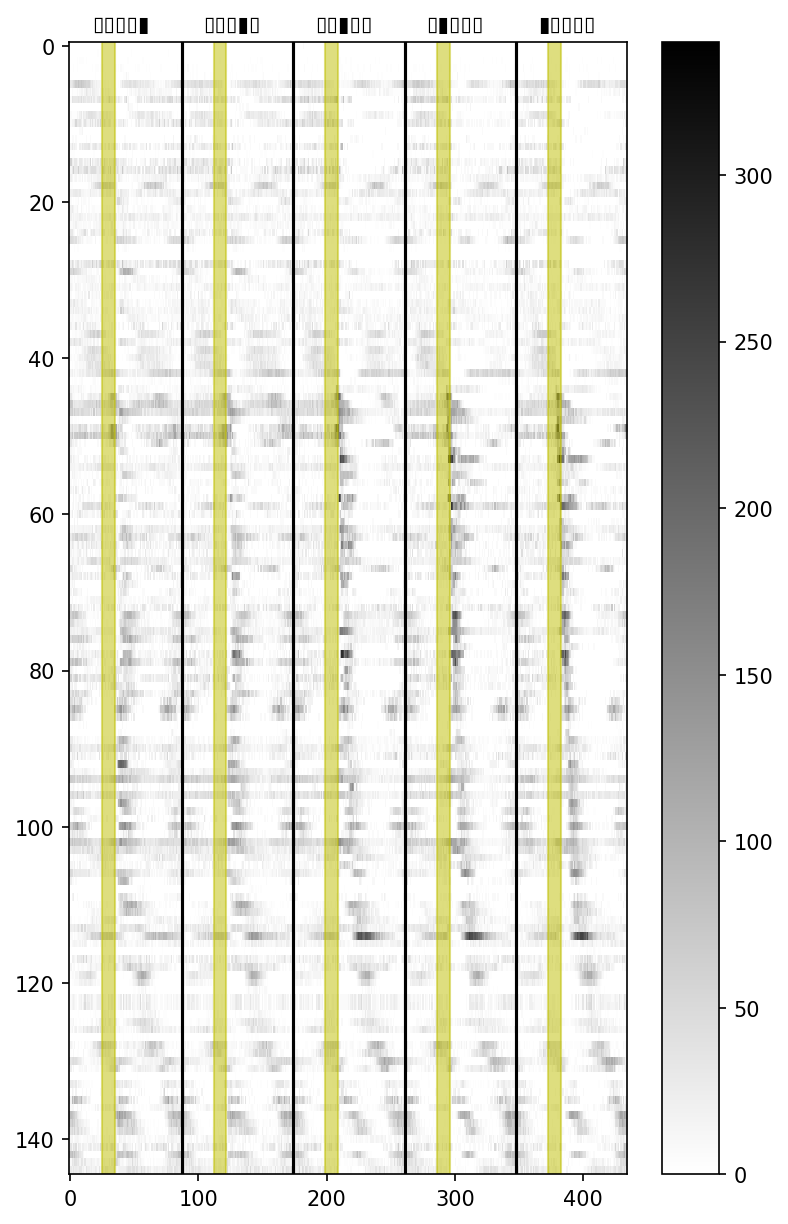

In [12]:
plt.figure(figsize=(6, 10), dpi=150)
sorted_args = np.argsort(np.argmax(mean_usrt1[:, onset_trials[-1]], axis=-1))

plt.imshow(mean_usrt1[sorted_args][:, onset_trials, 25:].reshape(145, -1), cmap='binary', aspect='auto')
plt.axvspan(25, 35, color='y', alpha=0.5)
for i in range(1, 5):
    plt.axvline(87*i, color='k')
    plt.axvspan(25+87*i, 35+87*i, color='y', alpha=0.5)
    plt.text(17+87*i, -2, glyphs[onset_trials[i]])
plt.colorbar()
plt.text(17, -2, glyphs[onset_trials[0]])

In [12]:
### Sort 
sorted_args = np.argsort(np.argmax(mean_usrt1[:, -1], axis=-1))
print(sorted_args)

[ 20  29  54 121 133 129 134 123 136  15 141  90 143 124 127 131 112  24
 107 116  60  93 130  10  16   5 105  83  79  91  99  96 111 110 102  68
 109 108  38  85  97  67  11 114  86  63  80  89 120 118  64 119  47  82
 122  55 126  58  42  77 132 135  73 140  65   8  95  41  46  56 106  44
  43 144 128   9   6 101  52  92 117 125   4  61   0  49  59   7  53 138
 137  33  45 100 113  22 139 142  17  81  78  69  70  40  36 103  23  37
  84  71  66  27  74  76  75  18  21  26  32  31  30  57  28  14  13  87
  12  62  25   2  51  35   3   1  48  19  39 104  50  94  34 115  98  72
  88]


In [13]:
select_trials = [31, 30, 28, 24, 16, 8, 4, 2, 1, 0]
conc_trials = [31, 30, 28, 24, 16]
onset_trials = [1, 2, 4, 8, 16]

[print(bin(i)) for i in select_trials]

0b11111
0b11110
0b11100
0b11000
0b10000
0b1000
0b100
0b10
0b1
0b0


[None, None, None, None, None, None, None, None, None, None]

In [ ]:
### Generate the plots for the stimuli
plots_conc = [br.binary_plotter(i) for i in conc_trials]
plots_onset = [br.binary_plotter(i) for i in onset_trials]
plots_all = [br.binary_plotter(i) for i in select_trials]

In [15]:
### Getting the PID and flow recording
odour_path = "/home/camp/warnert/working/Recordings/Set up recordings/200615 - Binary pulse calibration/"


EB_trials = open(odour_path + '2020-06-15trial_name_flowmeter_EB_2.txt', 'r').readlines()
trial_order = []
for i in EB_trials:
    if ':' not in i:
        trial_order.append(i.split('_')[1][:-1])
EB_flows = sio.loadmat(odour_path+'Flowmeter_EB_pulses_3.mat')
print(EB_flows.keys())
trig = EB_flows['Flowmeter_EB_pulses_3_Ch8'][-1][-1][-1]
EB_flowmeter = EB_flows['Flowmeter_EB_pulses_3_Ch7'][-1][-1][-1]
print(EB_flows.keys())

EB_PIDs = sio.loadmat(odour_path+'PID_all_pulses_PID.mat')

PID = EB_PIDs['PID_all_pulses_PID_Ch6'][-1][-1][-1]
PID_trig = EB_PIDs['PID_all_pulses_PID_Ch8'][-1][-1][-1]

PID_trials = open(odour_path+'2020-06-15trial_name.txt', 'r').readlines()
PID_order = []
for i in PID_trials:
    if ':' not in i:
        PID_order.append(i.split('_')[1][:-1])
        

IA_flows = sio.loadmat(odour_path+'Flowmeter_IA_pulses.mat')
trig_IA = IA_flows['Flowmeter_IA_pulses_Ch8'][-1][-1][-1]
flowmeter_IA = IA_flows['Flowmeter_IA_pulses_Ch7'][-1][-1][-1]

IA_trials = open(odour_path+'2020-06-15trial_name_flowmeter_IA.txt')
IA_order = []

for i in IA_trials:
    if ':' not in i:
        IA_order.append(i.split('_')[1][:-1])
        
prev_start = 0
EB_flow_starts = []
for index, i in enumerate(trig):
    if i > 1 and index - prev_start > 10000:
        EB_flow_starts.append(index)
        prev_start = index

        
PID_starts = []
prev_start = 0
for index, i in enumerate(PID_trig):
    if i > .5 and index - prev_start > 10000:
        PID_starts.append(index)
        prev_start = index
print(len(PID_starts)/32)

IA_starts = []
prev_start = 0
for index, i in enumerate(trig_IA):
    if i > 1 and index - prev_start > 10000:
        IA_starts.append(index)
        prev_start = index
        
trial_order = np.array(trial_order)
PID_order = np.array(PID_order)
EB_flow_starts = np.array(EB_flow_starts)
PID_starts = np.array(PID_starts)
IA_starts = np.array(IA_starts)
IA_order = np.array(IA_order)
fs = 10000
pre_window=0.5
post_window=0.62
#trial_order.astype(np.int)
all_trial_flows = []
all_trials_PID = []
all_trials_IA = []
for i in range(32):
    trial_starts = EB_flow_starts[(trial_order == str(i))]
    trial_flows = [EB_flowmeter[int(j-fs*pre_window):int(j+fs*post_window)] for j in trial_starts]
    all_trial_flows.append(trial_flows)
    PID_trials = PID_starts[(PID_order == str(i))]
    trial_PIDs = [PID[int(j-fs*pre_window):int(j+fs*post_window)] for j in PID_trials]
    all_trials_PID.append(trial_PIDs)
    
    trials_IA = IA_starts[(IA_order == str(i))]
    trial_IAs = [flowmeter_IA[int(j - fs*pre_window):int(j+fs*post_window)] for j in trials_IA]
    all_trials_IA.append(trial_IAs)
mean_trial_flows = np.mean(all_trial_flows, axis=1)
mean_trial_PIDs = np.mean(all_trials_PID, axis=1)
mean_trial_IA = np.mean(all_trials_IA, axis=1)

dict_keys(['__header__', '__version__', '__globals__', 'Flowmeter_EB_pulses_3_Ch1', 'Flowmeter_EB_pulses_3_Ch2', 'Flowmeter_EB_pulses_3_Ch3', 'Flowmeter_EB_pulses_3_Ch4', 'Flowmeter_EB_pulses_3_Ch5', 'Flowmeter_EB_pulses_3_Ch6', 'Flowmeter_EB_pulses_3_Ch7', 'Flowmeter_EB_pulses_3_Ch8', 'Flowmeter_EB_pulses_3_Ch31'])
dict_keys(['__header__', '__version__', '__globals__', 'Flowmeter_EB_pulses_3_Ch1', 'Flowmeter_EB_pulses_3_Ch2', 'Flowmeter_EB_pulses_3_Ch3', 'Flowmeter_EB_pulses_3_Ch4', 'Flowmeter_EB_pulses_3_Ch5', 'Flowmeter_EB_pulses_3_Ch6', 'Flowmeter_EB_pulses_3_Ch7', 'Flowmeter_EB_pulses_3_Ch8', 'Flowmeter_EB_pulses_3_Ch31'])
5.0


In [16]:
mats = sio.loadmat('/home/camp/warnert/working/Recordings/Set up recordings/200618 - Binary pulse calibration/200618_EB_IA_5_reps_altered_duties.mat')
print(mats.keys())
trigs = mats['V200618_EB_IA_5_reps_altered_duties_Ch8'][-1][-1][-1]
flows = mats['V200618_EB_IA_5_reps_altered_duties_Ch7'][-1][-1][-1]

prev_start = 0 
flow_starts = []
for index, i in enumerate(trigs):
    if i > 1 and index - prev_start > 10000:
        flow_starts.append(index)
        prev_start = index
        
all_flows = []
for i in range(64):
    reps = flow_starts[i::64]
    flow_reps = [flows[j-2000:j+5000] for j in reps]
    all_flows.append(flow_reps)

dict_keys(['__header__', '__version__', '__globals__', 'V200618_EB_IA_5_reps_altered_duties_Ch1', 'V200618_EB_IA_5_reps_altered_duties_Ch2', 'V200618_EB_IA_5_reps_altered_duties_Ch3', 'V200618_EB_IA_5_reps_altered_duties_Ch4', 'V200618_EB_IA_5_reps_altered_duties_Ch5', 'V200618_EB_IA_5_reps_altered_duties_Ch6', 'V200618_EB_IA_5_reps_altered_duties_Ch7', 'V200618_EB_IA_5_reps_altered_duties_Ch8', 'V200618_EB_IA_5_reps_altered_duties_Ch31'])


Text(0.5, 1.0, 'EB_10/1010')

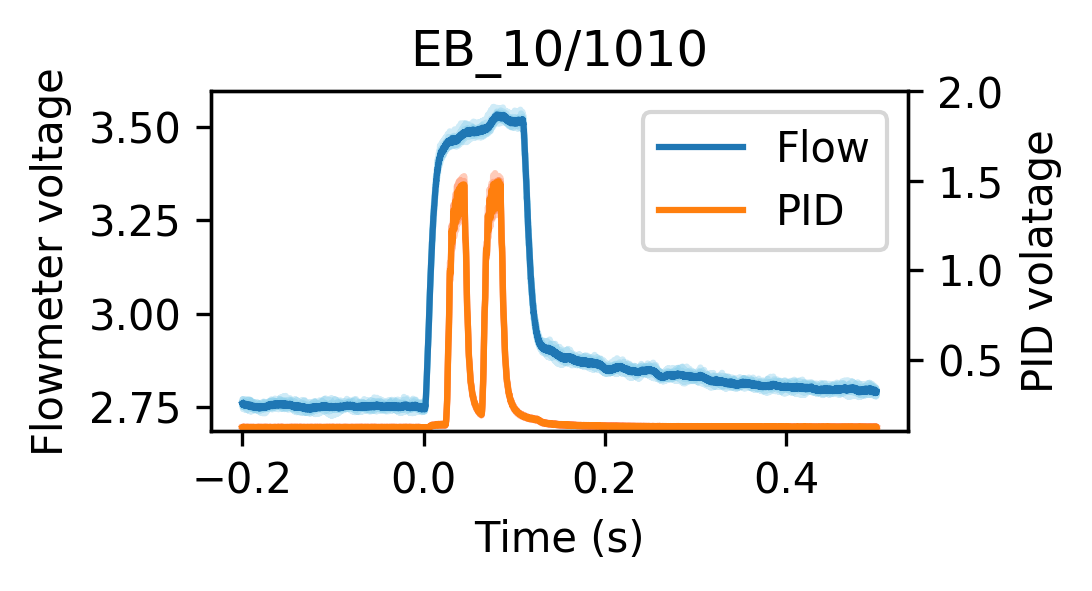

In [17]:
fig = plt.figure(figsize=(3, 1.5), dpi=300)

xs = np.arange(-.2, .5, 1/10000)
trial_num = 10
ax = fig.add_subplot(111)
for i in all_flows[trial_num]:
    plt.plot(xs, i, color='skyblue', alpha=0.4)
ax.plot(xs, np.mean(all_flows, axis=1)[trial_num], label='Flow')

ax.set_ylabel('Flowmeter voltage')
ax2 = ax.twinx()
ax2.plot([], label='Flow')
for i in all_trials_PID[trial_num]:
    ax2.plot(xs, i[3070:10070], alpha=0.4, color='coral')
ax2.plot(xs, mean_trial_PIDs[trial_num][3070:10070],  label='PID',color='C1')
ax2.set_ylim(.1, 2)
ax2.set_ylabel('PID volatage')
plt.legend()
ax.set_xlabel('Time (s)')
ax.set_title('EB_%d/%s' % (trial_num, str(bin(trial_num)[2:])))


In [18]:
def plot_pid_and_flow(trial_num, ax, legend=False):
    xs = np.arange(-.2, .5, 1/10000)
    for i in all_flows[trial_num]:
        ax.plot(xs, i, color='skyblue', alpha=0.4)
    ax.plot(xs, np.mean(all_flows, axis=1)[trial_num], label='Flow')
    #ax.set_ylabel('Flowmeter voltage')
    ax2 = ax.twinx()
    ax2.plot([], label='Flow')
    for i in all_trials_PID[trial_num]:
        ax2.plot(xs, i[3070:10070], alpha=0.4, color='coral')
    ax2.plot(xs, mean_trial_PIDs[trial_num][3070:10070],  label='PID',color='C1')
    ax2.set_ylim(.1, 2)
    #ax2.set_ylabel('PID volatage')
    if legend:
        plt.legend()
    #ax.set_xlabel('Time (s)')
    #ax.set_title('EB_%d/%s' % (trial_num, str(bin(trial_num)[2:])))
    return ax

In [19]:
def plot_onset_and_conc(mean_resp, onset_ax, conc_ax):
    xs = np.arange(-.5, .62, 1/100)[:-1]

    conc_ax.plot(xs, mean_resp[0], color='k', linestyle='--')
    conc_ax.plot(xs, mean_resp[conc_trials[-1]], color='lightgray')
    for index, i in enumerate(conc_trials[:-1]):
        conc_ax.plot(xs, mean_resp[i], color=matplotlib.cm.bwr((index+1)/len(conc_trials)/2))

    conc_ax.axvspan(0, 0.1, color='yellow', alpha=0.5)
    onset_ax.plot(xs, mean_resp[0], color='k', linestyle='--')
    for index2, i in enumerate(onset_trials[::-1]):
        onset_ax.plot(xs, mean_resp[i], color=matplotlib.cm.bwr(.5 + (index2)/len(plots_conc)/2))
    onset_ax.plot(xs, mean_resp[conc_trials[-1]], color='lightgray')
    onset_ax.axvspan(0, 0.1, color='yellow', alpha=0.5, zorder=-100)
    onset_ax.set_xticklabels([])

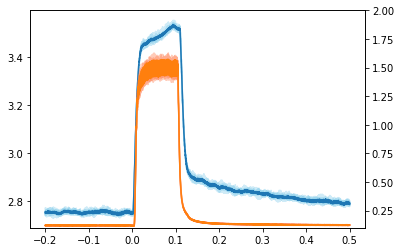

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = plot_pid_and_flow(31, ax)

In [21]:
def plot_heatmap(ax, mean_usrt, select_trials, sorted_args=None, time_offset=25, cmap='binary', time_ticks_base = None, colorbar_ax=None):  
    if sorted_args is None:
        sorted_args = np.argsort(np.argmax(mean_usrt[:, select_trials[::-1][-1]], axis=-1))
    im = ax.imshow(mean_usrt[sorted_args][:, select_trials[::-1], time_offset:].reshape(145, -1), cmap=cmap, aspect='auto')
    ax.axvspan(50-time_offset, 50-time_offset+10, color='y', alpha=0.2)
    time_len = mean_usrt.shape[-1] - time_offset
    if time_ticks_base is None:
        pre_window = time_offset/100 - .5
        post_window = time_len/100 + pre_window
        
        time_ticks_base = np.arange(pre_window, post_window, -1*pre_window)
    
    full_xs = np.arange(time_offset/100-.5, time_len/100, 1/100).round(2)
    print(full_xs.round(2))
    xticks_base = np.array([np.where(full_xs == i)[0][0] for i in time_ticks_base])
    
 #   xticks_base = np.linspace(0, time_len, int(pre_window*-100))
    print(xticks_base)
    time_ticks = []
    xticks = []
    for i in range(len(select_trials)):
        xticks.append(xticks_base+i*time_len)
        time_ticks.append(time_ticks_base)

    ax.set_xticks(np.concatenate(xticks))
    
    ax.set_xticklabels(np.concatenate(time_ticks), rotation=90)
    for i in range(1, 10):
        ax.axvline(87*i, color='k')
        ax.axvspan(25+87*i, 35+87*i, color='y', alpha=0.2)
        ax.text(17+87*i, -2, glyphs[select_trials[::-1][i]])
    if colorbar_ax is None:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        plt.colorbar(mappable=im, cax=cax)
    else:
        plt.colorbar(mappable=im, cax=colorbar_ax)
    ax.text(17, -2, glyphs[select_trials[-1]])
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Units')

In [37]:
def plot_psth(fig, gs, usrt, selected_trials, ui, xs, cmap='RdYlGn'):
    mean_usrt = [np.mean(i, axis=0) for i in usrt[ui]]
    std_usrt = [np.std(i, axis=0) for i in usrt[ui]]
    sub_gridspec = gs.subgridspec(ncols=1, nrows=2, hspace=.1)

    ax1 = fig.add_subplot(sub_gridspec[0])
    ax2 = fig.add_subplot(sub_gridspec[1])
    selected_trials = selected_trials[::-1]

    count = 0
    ax1.plot(xs, mean_usrt[0], color='k', linestyle='--')
    ax2.plot(xs, mean_usrt[0], color='k', linestyle='--')
    for index, i in enumerate(selected_trials[1:6]):
        ax1.plot(xs, mean_usrt[i], color=matplotlib.cm.get_cmap(cmap)(index/(len(selected_trials)-1)))
        count += 1
    count -= 1
    for index, i in enumerate(selected_trials[5:]):
        ax2.plot(xs, mean_usrt[i], color=matplotlib.cm.get_cmap(cmap)((index+count)/(len(selected_trials)-1)))
    
    ax1_lims = ax1.get_ylim()
    ax2_lims = ax2.get_ylim()
    ylim_max = np.max([ax1_lims, ax2_lims])
    ylim_min = np.min([ax1_lims, ax2_lims])
    ylim = [ylim_min, ylim_max]
    ax1.axvspan(0, 0.1, color='lightgray')
    ax2.axvspan(0, 0.1, color='lightgray')
    ax1.set_ylim(ylim)
    ax2.set_ylim(ylim)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax1.set_xticklabels([])


In [81]:
def dendo_and_heatmaps(fig, gs, link, summed_response, **kwargs):
    
    sub_gridspec = gs.subgridspec(1, 2, wspace=0.3)
    sub_sub_gridspec = sub_gridspec[0].subgridspec(1, 2, wspace=0.0)

    dend_ax = fig.add_subplot(sub_sub_gridspec[0])
    dend = dendrogram(link, ax=dend_ax, orientation='left', truncate_mode=None, no_labels=True)
    dend_ax.set_ylabel('Units')
    dend_ax.set_xlabel('Distance')
    dend_ax.set_xticks([])
    norm_heatmap_ax = fig.add_subplot(sub_sub_gridspec[1])
    resp_heatmap_ax = fig.add_subplot(sub_gridspec[1])
    im = norm_heatmap_ax.imshow(summed_response[dend['leaves'][::-1]]/np.max(summed_response, axis=-1)[dend['leaves'][::-1], np.newaxis], cmap='pink', aspect='auto')
#     plt.colorbar(mappable=im, ax=norm_heatmap_ax, aspect=40)
    norm_heatmap_ax.set_xticks(range(32))
    norm_heatmap_ax.set_xticklabels(glyphs, rotation=90, fontsize=5);
    norm_heatmap_ax.set_yticks([])
    divider = make_axes_locatable(norm_heatmap_ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    plt.colorbar(im, cax=cax)
#    heatmap_cbar_ax = fig.add_subplot(sub_gridspec[39])
    plot_heatmap(resp_heatmap_ax, mean_usrt1, select_trials, dend['leaves'][::-1], **kwargs)
 #   normed_cbar_ax = fig.add_subplot(sub_gridspec[37])
#    plt.colorbar(mappable=im, cax=normed_cbar_ax)

def plot_heatmap(ax, mean_usrt, select_trials, sorted_args=None, time_offset=25, cmap='binary', time_ticks_base = None, colorbar_ax=None):  
    if sorted_args is None:
        sorted_args = np.argsort(np.argmax(mean_usrt[:, select_trials[::-1][-1]], axis=-1))
    im = ax.imshow(mean_usrt[sorted_args][:, select_trials[::-1], time_offset:].reshape(145, -1), cmap=cmap, aspect='auto')
    ax.axvspan(50-time_offset, 50-time_offset+10, color='y', alpha=0.2)
    time_len = mean_usrt.shape[-1] - time_offset
    if time_ticks_base is None:
        pre_window = time_offset/100 - .5
        post_window = time_len/100 + pre_window
        
        time_ticks_base = np.arange(pre_window, post_window, -1*pre_window)
    
    full_xs = np.arange(time_offset/100-.5, time_len/100, 1/100).round(2)
    print(full_xs.round(2))
    xticks_base = np.array([np.where(full_xs == i)[0][0] for i in time_ticks_base])
    
 #   xticks_base = np.linspace(0, time_len, int(pre_window*-100))
    print(xticks_base)
    time_ticks = []
    xticks = []
    for i in range(len(select_trials)):
        xticks.append(xticks_base+i*time_len)
        time_ticks.append(time_ticks_base)

    ax.set_xticks(np.concatenate(xticks))
    
    ax.set_xticklabels(np.concatenate(time_ticks), rotation=90)
    for i in range(1, 10):
        ax.axvline(87*i, color='k')
        ax.axvspan(25+87*i, 35+87*i, color='y', alpha=0.2)
        ax.text(17+87*i, -2, glyphs[select_trials[::-1][i]], fontsize=7)
    if colorbar_ax is None:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='2.5%', pad=0.05)
        plt.colorbar(mappable=im, cax=cax)
    else:
        plt.colorbar(mappable=im, cax=colorbar_ax)
    ax.text(17, -2, glyphs[select_trials[-1]], fontsize=7)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Units')

[-0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17 -0.16 -0.15 -0.14
 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02
 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1
  0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22
  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34
  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46
  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58
  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7
  0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82
  0.83  0.84  0.85  0.86  0.87]
[ 0 25 50]


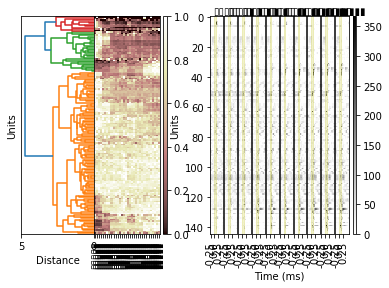

In [65]:
fig = plt.figure()
gs = matplotlib.gridspec.GridSpec(1, 1)[0]
dendo_and_heatmaps(fig, gs, link, summed_response1, time_ticks_base=[-0.25, 0.0, 0.25])

[-0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17 -0.16 -0.15 -0.14
 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02
 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1
  0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22
  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34
  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46
  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58
  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7
  0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82
  0.83  0.84  0.85  0.86  0.87]
[ 0 25 50]


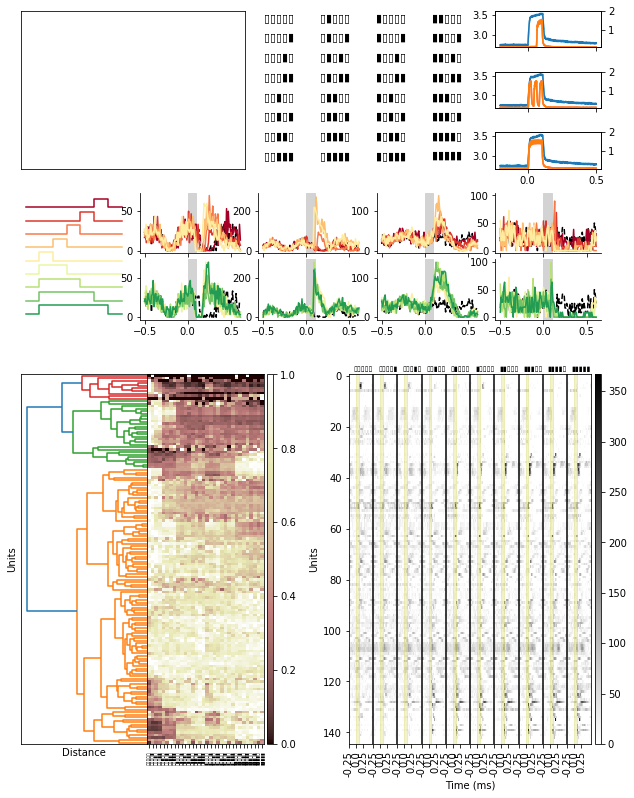

In [82]:
### Fig 1 plotting
fig = plt.figure(figsize=(8.3, 11.7))
gs = matplotlib.gridspec.GridSpec(25, 15,wspace=.5, hspace=4, left=0.0, right=0.97, bottom=0.1, top=0.97)

mouse_ax = fig.add_subplot(gs[:6, :6])
mouse_ax.set_xticks([])
mouse_ax.set_yticks([])
blip_ax = fig.add_subplot(gs[:6, 6:12])
for i in range(32):
    blip_ax.text(int(i/8)+0.1, 8-i%8-0.5, glyphs[i], fontsize=11)
blip_ax.set_xlim(0, 4)
blip_ax.set_ylim(0, 8)
blip_ax.axis('off')

odour_ax1 = fig.add_subplot(gs[:2, 12:15])
odour_ax2 = fig.add_subplot(gs[2:4, 12:15], sharex=odour_ax1, sharey=odour_ax1)
odour_ax3 = fig.add_subplot(gs[4:6, 12:15], sharex=odour_ax1, sharey=odour_ax1)
plt.setp(odour_ax1.get_xticklabels(), visible=False)
plt.setp(odour_ax2.get_xticklabels(), visible=False)
odour_ax1 = plot_pid_and_flow(3, odour_ax1)
odour_ax2 = plot_pid_and_flow(21, odour_ax2)
odour_ax3 = plot_pid_and_flow(31, odour_ax3)


xs = np.arange(-.5, .62, 1/100)[:-1]
stimuli_ax = fig.add_subplot(gs[6:11, :3])

for index, i in enumerate(plots_all[:-1][::-1]):
    stimuli_ax.step(range(len(i)), i-index*1.5, color=matplotlib.cm.RdYlGn(index/(len(plots_all)-1)))
    
stimuli_ax.axis('off')
#plot_psth(fig, gs[20:25, :3], units_usrt1, select_trials, 42, xs)
plot_psth(fig, gs[6:11, 3:6], units_usrt1, select_trials, sorted_args[-38], xs)
plot_psth(fig, gs[6:11, 6:9], units_usrt1, select_trials, 42, xs)
plot_psth(fig, gs[6:11, 9:12], units_usrt1, select_trials, sorted_args[99], xs)
plot_psth(fig, gs[6:11, 12:15], units_usrt1, select_trials, sorted_args[5], xs)

dendo_and_heatmaps(fig, gs[12:25, :], link, summed_response1, time_ticks_base=[-0.25, 0.0, 0.25])


In [44]:
#In response plot include example cell PSTH
# In response plot possibly sort by Hierarchical clustering
# In resposne plot change the colour of the odour band
# In rp fix the x tics
# in rp decrease colourbar size


In [139]:
print(np.argsort(np.argmax(mean_usrt1[sorted_args1, :, 50:100].sum(axis=-1), axis=-1)))

[ 81  83  23  24 116  26  27  28  21  84 114  87 107  91 104  92  99 115
  95  41  18 139 137   3  69  63 143 135  19  61  57  12  75 128  76  77
  60  73  49  79  93  33  67   4   6 131  11 117  13 127  96 103 136   8
  58  16  20  29  86  65  90   0 111  85 132 106 126  72  40  14 140   2
 113 109 142  78  32  10 101  31 125   1   5  35  22  50  55  71   7 130
 100  62  17 110 112 129  97 121   9 120  36 119  48  52  45  38  66 134
  56  82  98 122  15 144 105  68  70  59 102  94  89 138  74  80  46 108
  88 123  43  34  47  30  25  54  64 141 118  44  39 133  51 124  42  37
  53]


[-0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17 -0.16 -0.15 -0.14
 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05 -0.04 -0.03 -0.02
 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1
  0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22
  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34
  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46
  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58
  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7
  0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82
  0.83  0.84  0.85  0.86  0.87]
[ 0 25 50 75]


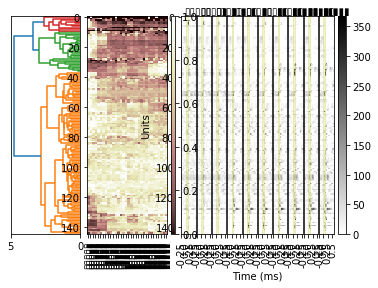

In [101]:
fig = plt.figure()
gs = matplotlib.gridspec.GridSpec(1, 1)
dendo_and_heatmaps(fig, gs[0], link, summed_response1)